#Install packages and import library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
infor = pd.read_csv('https://docs.google.com/spreadsheets/d/1__5ycLLTwkrLMooRF_mDoYJSOW7IqajiVqjZNfcc5do/export?format=csv')
sale = pd.read_csv('https://docs.google.com/spreadsheets/d/1me2bahTBL_CinjezQG3k4cS1YCRnD05QEDq9HtiFsGI/export?format=csv')
price = pd.read_csv('https://docs.google.com/spreadsheets/d/18FsEj5FaEHHyYv2JTd05d_RbfaCFKX9O2a_KHt1PH4o/export?format=csv')

In [ ]:
price = pd.read_csv('https://docs.google.com/spreadsheets/d/18FsEj5FaEHHyYv2JTd05d_RbfaCFKX9O2a_KHt1PH4o/export?format=csv')

In [ ]:
infor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Maker         268255 non-null  object 
 1   Genmodel      268255 non-null  object 
 2   Genmodel_ID   268255 non-null  object 
 3   Adv_ID        268255 non-null  object 
 4   Adv_year      268255 non-null  int64  
 5   Adv_month     268255 non-null  int64  
 6   Color         246380 non-null  object 
 7   Reg_year      268248 non-null  float64
 8   Bodytype      267301 non-null  object 
 9   Runned_Miles  267200 non-null  object 
 10  Engin_size    266191 non-null  object 
 11  Gearbox       268088 non-null  object 
 12  Fuel_type     267846 non-null  object 
 13  Price         267110 non-null  float64
 14  Engine_power  236444 non-null  float64
 15  Annual_Tax    221580 non-null  object 
 16  Wheelbase     240257 non-null  float64
 17  Height        240454 non-null  float64
 18  Widt

# Reformat dataframes

##Rename columns of infor

In [ ]:
infor.rename(columns={infor.columns[1]: 'Genmodel'}, inplace=True)
infor.rename(columns={infor.columns[2]: 'Genmodel_ID'}, inplace=True)

##Keep latest entry price

In [ ]:
price = price.sort_values('Year', ascending=False)
price = price.drop_duplicates(subset=['Maker', 'Genmodel', 'Genmodel_ID'], keep='first')

In [ ]:
price.drop('Year', axis=1, inplace=True)

## Lowercase Maker and Genmodel

In [ ]:
infor['Maker'] = infor['Maker'].str.lower()
infor['Genmodel'] = infor['Genmodel'].str.lower()
sale['Maker'] = sale['Maker'].str.lower()
sale['Genmodel'] = sale['Genmodel'].str.lower()
price['Maker'] = price['Maker'].str.lower()
price['Genmodel'] = price['Genmodel'].str.lower()

##Add entry price to infor table

In [ ]:
price

,Maker,Genmodel,Genmodel_ID,Entry_price
1823,ford,transit courier,29_37,18590
5068,ssangyong,tivoli xlv,85_8,19220
5383,toyota,gt86,92_17,26495
3207,mclaren,600lt,58_9,201500
491,bmw,6 series,8_11,43645
...,...,...,...,...
1341,ferrari,f355,27_17,94840
6228,volvo,s70,96_19,18815
5500,toyota,starlet,92_36,7845
4710,rover,600,78_8,15500


In [ ]:
infor = infor.merge(price, how='inner', on = ['Maker', 'Genmodel', 'Genmodel_ID'])

In [ ]:
infor.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Annual_Tax,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num,Entry_price
0,bentley,arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,...,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400
1,bentley,arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,...,315,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0,174400
2,bentley,arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,...,315,3116.0,1515.0,2125.0,5390.0,14.7 mpg,155 mph,5.0,4.0,174400
3,bentley,arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,...,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400
4,bentley,arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,...,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400


In [ ]:
infor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229078 entries, 0 to 229077
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Maker         229078 non-null  object 
 1   Genmodel      229078 non-null  object 
 2   Genmodel_ID   229078 non-null  object 
 3   Adv_ID        229078 non-null  object 
 4   Adv_year      229078 non-null  int64  
 5   Adv_month     229078 non-null  int64  
 6   Color         209672 non-null  object 
 7   Reg_year      229073 non-null  float64
 8   Bodytype      228650 non-null  object 
 9   Runned_Miles  228187 non-null  object 
 10  Engin_size    227165 non-null  object 
 11  Gearbox       228957 non-null  object 
 12  Fuel_type     228796 non-null  object 
 13  Price         228398 non-null  float64
 14  Engine_power  203391 non-null  float64
 15  Annual_Tax    194860 non-null  object 
 16  Wheelbase     208255 non-null  float64
 17  Height        208269 non-null  float64
 18  Widt

## Remove maker name in genmodel column

In [ ]:
def rename_gen(df):
  name = df['Maker']
  df['Genmodel'] = df['Genmodel'].replace(name + ' ', '')
  return df['Genmodel']
sale['Genmodel']= sale.apply(rename_gen, axis= 1)

In [ ]:
sale.head()

,Maker,Genmodel,Genmodel_ID,2020,2019,2018,2017,2016,2015,2014,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,abarth,124,2_1,0,19,27,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abarth,500,2_2,0,0,1,2,66,717,762,...,915,766,0,0,0,0,0,0,0,0
2,abarth,595,2_4,2144,2866,3907,3295,3132,1612,516,...,0,0,0,0,0,0,0,0,0,0
3,abarth,695,2_6,45,65,270,114,29,10,14,...,0,0,0,0,0,0,0,0,0,0
4,abarth,punto,2_9,0,0,0,0,0,0,56,...,97,172,74,0,0,0,0,0,0,0


#Reformat the parameters

##Runned_Miles

In [ ]:
def runned_miles(x):
  x= str(x)
  if 'mile' in x:
    x = x.strip(' mile')
    return x
  else:
    return x
infor['Runned_Miles'] = infor['Runned_Miles'].apply(runned_miles)
infor[infor['Runned_Miles'].str.contains('mile', na=False)]['Runned_Miles']
infor['Runned_Miles'] = infor['Runned_Miles'].astype('float')

##Engin size

In [ ]:
infor['Engin_size']= infor['Engin_size'].str.strip('L')
infor['Engin_size']= infor['Engin_size'].astype('float')

##Average mpg

In [ ]:
infor['Average_mpg']= infor['Average_mpg'].str.strip(' mpg')
infor['Average_mpg']= infor['Average_mpg'].astype('float')

##Top speed

In [ ]:
infor['Top_speed']= infor['Top_speed'].str.strip(' mph')
infor['Top_speed']= infor['Top_speed'].astype('float')

# Loss rate

In [ ]:
infor['loss_rate'] = (infor['Entry_price'] - infor['Price']) / infor['Entry_price'] * 100

In [ ]:
infor

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num,Entry_price,loss_rate
0,bentley,arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000.0,...,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,87.672018
1,bentley,arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000.0,...,3116.0,1515.0,2125.0,5390.0,13.7,179.0,5.0,4.0,174400,83.514908
2,bentley,arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000.0,...,3116.0,1515.0,2125.0,5390.0,14.7,155.0,5.0,4.0,174400,82.798739
3,bentley,arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000.0,...,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,79.961009
4,bentley,arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652.0,...,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,84.773509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229073,volvo,v50,96_9,96_9$$522,2018,7,Grey,2008.0,Estate,140000.0,...,2640.0,1457.0,1770.0,4522.0,48.7,127.0,5.0,5.0,19375,83.561290
229074,volvo,v50,96_9,96_9$$523,2018,8,Blue,2007.0,Estate,158000.0,...,2640.0,1457.0,1770.0,4522.0,40.4,137.0,5.0,5.0,19375,84.567742
229075,volvo,v50,96_9,96_9$$524,2018,5,Silver,2009.0,Estate,94000.0,...,2640.0,1457.0,1770.0,4522.0,40.4,137.0,5.0,5.0,19375,78.064516
229076,volvo,v50,96_9,96_9$$525,2018,5,Silver,2004.0,Estate,111000.0,...,2640.0,1452.0,1770.0,4514.0,31.0,134.0,5.0,5.0,19375,85.058065


In [ ]:
infor['loss_rate'] = infor['loss_rate'].round(2)

In [ ]:
infor.to_csv('infor.csv')

# Find top growth speed of makers

In [ ]:
df = sale.groupby(['Maker']).sum()
df = df[[str(i) for i in range(2001, 2021)]]

<ipython-input-24-211ed226515d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = sale.groupby(['Maker']).sum()


In [ ]:
df

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Maker,,,,,,,,,,,,,,,,,,,,
abarth,0,0,0,0,0,0,0,74,938,1012,1002,1018,1111,1348,2339,3403,3880,4982,3173,2189
acura,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
aixam,0,4,4,4,18,23,54,55,55,41,70,57,57,64,64,68,57,32,2,0
alfa romeo,717,843,1002,1111,1338,2075,3872,3794,6909,7202,9787,6338,5044,5025,4679,4482,4350,3675,3156,1879
alpine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,149,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tvr,190,112,166,98,167,70,10,8,2,1,1,1,0,0,0,0,0,0,0,0
vauxhall,22351,35007,50632,69596,97761,130956,184798,193721,174372,196958,196349,203814,235334,249316,253060,237402,180667,167048,149626,92229
volkswagen,32355,52033,68076,77574,94145,116477,139481,133942,130918,147227,152641,160350,173971,195511,206396,191156,190554,192750,194121,137471


## Toc do tang truong sale

In [ ]:
growth_rate = df.pct_change(axis=1) * 100
growth_rate.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
growth_rate

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Maker,,,,,,,,,,,,,,,,,,,,
abarth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1167.567568,7.889126,-0.988142,1.596806,9.135560,21.332133,73.516320,45.489525,14.017044,28.402062,-36.310719,-31.011661
acura,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-100.000000,0.000000,-100.000000,NaN,NaN,0.000000,-100.000000,NaN,NaN,NaN,NaN,NaN,NaN
aixam,NaN,0.000000,0.000000,0.000000,350.000000,27.777778,134.782609,1.851852,0.000000,-25.454545,70.731707,-18.571429,0.000000,12.280702,0.000000,6.250000,-16.176471,-43.859649,-93.750000,-100.000000
alfa romeo,NaN,17.573222,18.861210,10.878244,20.432043,55.082212,86.602410,-2.014463,82.103321,4.240845,35.892808,-35.240625,-20.416535,-0.376685,-6.885572,-4.210301,-2.945114,-15.517241,-14.122449,-40.462611
alpine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,37.962963,-31.543624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tvr,NaN,-41.052632,48.214286,-40.963855,70.408163,-58.083832,-85.714286,-20.000000,-75.000000,-50.000000,0.000000,0.000000,-100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vauxhall,NaN,56.623865,44.633930,37.454574,40.469280,33.955258,41.114573,4.828515,-9.988076,12.952768,-0.309203,3.801904,15.465081,5.941343,1.501709,-6.187465,-23.898282,-7.538178,-10.429338,-38.360312
volkswagen,NaN,60.819039,30.832356,13.952054,21.361539,23.720856,19.749822,-3.971150,-2.257694,12.457416,3.677315,5.050412,8.494543,12.381374,5.567462,-7.383864,-0.314926,1.152429,0.711284,-29.182829


## Toc do tang truong trung binh

In [ ]:
# Calculate the average growth speed for each country
average_growth_speed = growth_rate.mean(axis=1)

In [ ]:
average_growth_speed

Maker
abarth        100.048894
acura         -42.857143
aixam          16.098029
alfa romeo      9.972354
alpine          2.139780
                 ...    
tvr           -29.349346
vauxhall       10.633260
volkswagen      9.306181
volvo          12.190252
zenos         -34.285714
Length: 73, dtype: float64

<Axes: xlabel='None'>

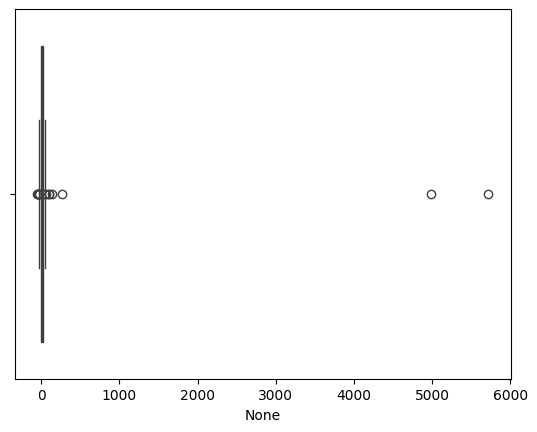

In [ ]:
sns.boxplot(x= average_growth_speed)

In [ ]:
# Sort the dataframe by 'average_growth_speed' in descending order and get the top countries
top_countries = average_growth_speed.sort_values(ascending=False)

In [ ]:
top_countries.describe()

count      73.000000
mean      160.682570
std       880.751617
min       -50.000000
25%         1.319140
50%        11.562485
75%        20.598403
max      5720.439374
dtype: float64

In [ ]:
IQR = top_countries.quantile(0.75) - top_countries.quantile(0.25)
upper = top_countries.quantile(0.75) + 1.5 * IQR
lower = top_countries.quantile(0.25) - 1.5 * IQR

In [ ]:
upper

49.51729615135392

In [ ]:
lower

-27.599753434350774

In [ ]:
top5_coun = list(top_countries[top_countries < upper].head(5).index)

## Top 5 hang xe co toc do tang truong thap nhat

In [ ]:
top_low = list(top_countries[top_countries > lower].tail(10).index)

In [ ]:
top_countries[top_countries > lower].tail(10)

Maker
daihatsu    -3.268142
dodge       -8.212458
maybach     -9.873737
ds         -10.212155
bristol    -20.000000
saab       -20.184826
tata       -21.428571
daewoo     -21.890399
reva       -23.650822
lincoln    -24.047619
dtype: float64

## Top 5 hang xe co toc do tang truong vuot bac

In [ ]:
top_outl = list(top_countries[top_countries > upper].head(5).index)

In [ ]:
top_countries[top_countries > upper]

Maker
dacia        5720.439374
smart        4986.887175
mclaren       263.455180
ssangyong     135.567203
abarth        100.048894
tesla          92.680861
infiniti       61.122004
kia            52.908128
dtype: float64

In [ ]:
top_outl

['dacia', 'smart', 'mclaren', 'ssangyong', 'abarth']

#Categorize growth speed of brands

In [ ]:
def classify(df):
  if df['Maker'] in (top5_coun):
    return 'high'
  elif df['Maker'] in (top_low):
    return 'low'
  elif df['Maker'] in (top_outl):
    return 'outstanding'
  else:
    pass
infor['classify'] = infor.apply(classify, axis=1)
infor2 = infor[infor['classify'].isna()==False]

In [ ]:
infor2

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num,Entry_price,loss_rate,classify
0,bentley,arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000.0,...,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,87.67,high
1,bentley,arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000.0,...,1515.0,2125.0,5390.0,13.7,179.0,5.0,4.0,174400,83.51,high
2,bentley,arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000.0,...,1515.0,2125.0,5390.0,14.7,155.0,5.0,4.0,174400,82.80,high
3,bentley,arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000.0,...,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,79.96,high
4,bentley,arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652.0,...,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,84.77,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161128,ssangyong,turismo,85_9,85_9$$51,2018,5,Black,2017.0,MPV,16110.0,...,1850.0,2365.0,5130.0,36.2,116.0,7.0,5.0,19625,-11.85,outstanding
161129,ssangyong,turismo,85_9,85_9$$52,2018,4,White,2015.0,MPV,31404.0,...,1850.0,2365.0,5130.0,36.2,108.0,7.0,5.0,19625,41.41,outstanding
161130,ssangyong,turismo,85_9,85_9$$53,2018,3,Red,2016.0,MPV,21951.0,...,1850.0,2365.0,5130.0,39.2,116.0,7.0,5.0,19625,28.66,outstanding
161131,ssangyong,turismo,85_9,85_9$$54,2018,5,White,2014.0,MPV,49925.0,...,1850.0,2365.0,5130.0,36.2,108.0,7.0,5.0,19625,41.90,outstanding


In [ ]:
infor2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6308 entries, 0 to 161132
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Maker         6308 non-null   object 
 1   Genmodel      6308 non-null   object 
 2   Genmodel_ID   6308 non-null   object 
 3   Adv_ID        6308 non-null   object 
 4   Adv_year      6308 non-null   int64  
 5   Adv_month     6308 non-null   int64  
 6   Color         6017 non-null   object 
 7   Reg_year      6308 non-null   float64
 8   Bodytype      6291 non-null   object 
 9   Runned_Miles  6252 non-null   float64
 10  Engin_size    6261 non-null   float64
 11  Gearbox       6303 non-null   object 
 12  Fuel_type     6298 non-null   object 
 13  Price         6308 non-null   float64
 14  Engine_power  4765 non-null   float64
 15  Annual_Tax    4578 non-null   object 
 16  Wheelbase     5289 non-null   float64
 17  Height        5289 non-null   float64
 18  Width         5287 non-nul

#Loss rate by class

<Axes: xlabel='loss_rate'>

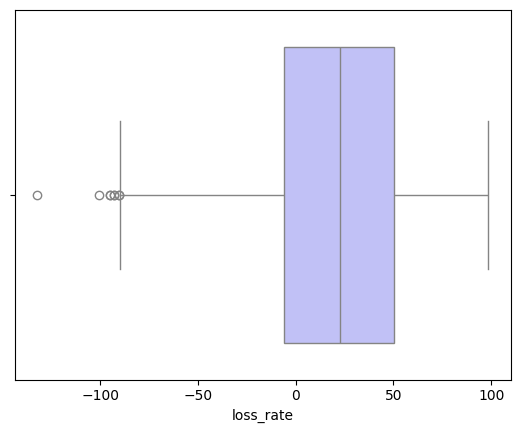

In [ ]:
sns.boxplot(x=infor2['loss_rate'], color = '#b8b8ff')

In [ ]:
infor2.groupby('classify')['Price'].mean()

classify
high           79161.239692
low            10352.696315
outstanding    15586.085094
Name: Price, dtype: float64

<ipython-input-47-034894d82924>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classify', y='loss_rate', data=infor2, order = order, palette= ['#ed6a5a','#f4f1bb','#9bc1bc'])


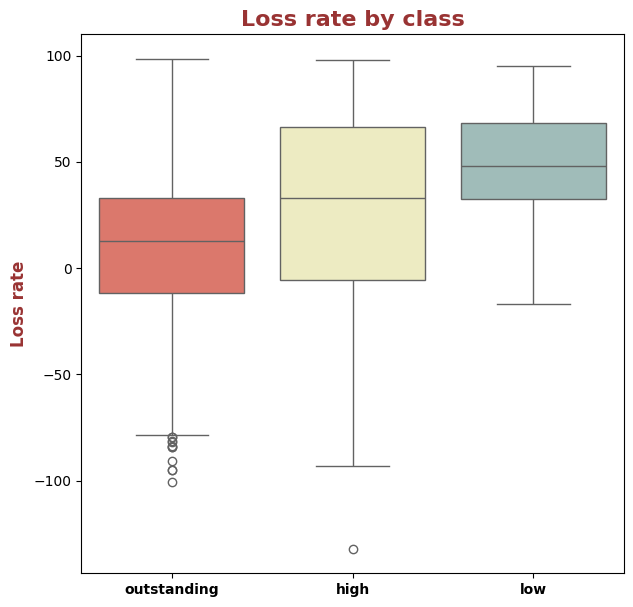

In [ ]:
plt.figure(figsize=(7, 7))
order = ['outstanding', 'high', 'low']
sns.boxplot(x='classify', y='loss_rate', data=infor2, order = order, palette= ['#ed6a5a','#f4f1bb','#9bc1bc'])

plt.title('Loss rate by class', fontsize=16, color="#993333", fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('Loss rate', fontsize=12, color="#993333", fontweight='bold')
plt.show()


Các dòng xe tăng trưởng cao có tỉ lệ trượt giá khi bán lại cao hơn 2 phân khúc còn lại

Riêng những dòng xe có tốc độ tăng trưởng vượt bậc có khả năng sinh lời khi bán lại rất cao, có thể từ gấp 2 đến 8 lần so với giá trị gốc

#Why we should devide data into smaller classes?

In [ ]:
top_outl

['dacia', 'smart', 'mclaren', 'ssangyong', 'abarth']

In [ ]:
top5_coun

['mg', 'bentley', 'lamborghini', 'corvette', 'cadillac']

In [ ]:
infor2[infor2['Maker']=='porsche']['Entry_price'].mean()

nan

In [ ]:
infor2.groupby('classify')['Entry_price'].median()

classify
high           140300.0
low             17090.0
outstanding     12485.0
Name: Entry_price, dtype: float64

<ipython-input-64-697601f3033d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classify', y='Entry_price', order= order, data=infor2, palette=['#ed6a5a','#f4f1bb','#9bc1bc'])


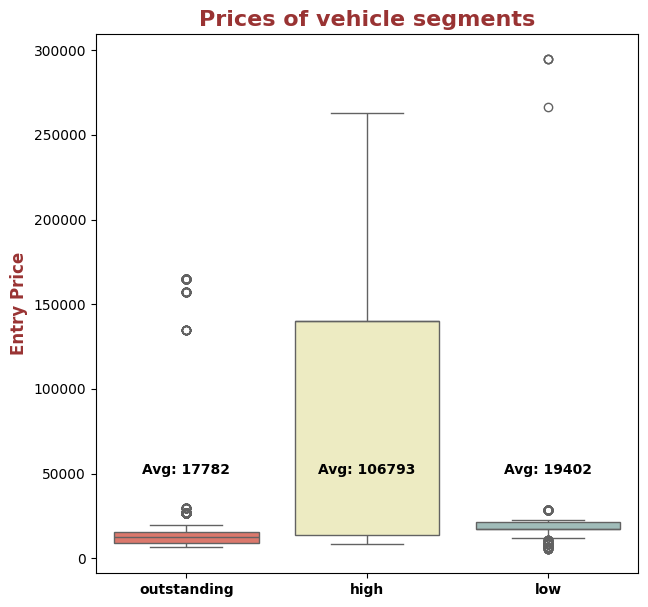

In [ ]:
plt.figure(figsize=(7, 7))
order = ['outstanding', 'high', 'low']
sns.boxplot(x='classify', y='Entry_price', order= order, data=infor2, palette=['#ed6a5a','#f4f1bb','#9bc1bc'])
#plt.title('Prices of vehicle segments')

means = infor2.groupby('classify')['Entry_price'].mean()
for i in range(len(means)):
    plt.text(i, 50000, f'Avg: {means[order[i]]:.0f}', horizontalalignment='center', weight='semibold')

plt.title('Prices of vehicle segments', fontsize=16, color="#993333", fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('Entry Price', fontsize=12, color="#993333", fontweight='bold')
plt.show()


In [ ]:
infor2.groupby('classify')['Entry_price'].mean()

classify
high           106793.266878
low             19402.293520
outstanding     17782.399215
Name: Entry_price, dtype: float64

In [ ]:
infor2[infor2['classify']=='low'].shape[0]

787

In [ ]:
infor2[infor2['classify']=='high'].shape[0]

2207

In [ ]:
infor2[infor2['classify']=='outstanding'].shape[0]

3314

In [ ]:
infor2[infor2['classify']=='high'].describe()

,Adv_year,Adv_month,Reg_year,Runned_Miles,Engin_size,Price,Engine_power,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num,Entry_price,loss_rate
count,2207.000000,2207.000000,2207.000000,2188.000000,2191.000000,2207.000000,1311.000000,1838.000000,1838.000000,1838.000000,1838.000000,1285.000000,1302.000000,2064.000000,2078.000000,2207.000000,2207.000000
mean,2018.019030,5.709560,2012.489352,25782.790219,4.203834,79161.239692,352.479962,2716.029380,1429.909140,2037.826442,4637.884113,33.228872,156.348694,3.952519,3.141482,106793.266878,28.775936
std,0.850364,2.564033,5.417372,27544.456336,2.033063,90951.557865,234.695239,212.746238,151.766179,142.070588,470.311543,13.429227,42.319088,1.143878,1.387822,76181.385607,43.286994
min,2013.000000,1.000000,1995.000000,0.000000,1.000000,300.000000,99.000000,2375.000000,1135.000000,1630.000000,3940.000000,13.300000,108.000000,2.000000,2.000000,8480.000000,-132.070000
25%,2018.000000,4.000000,2008.000000,3690.000000,1.600000,9611.500000,105.000000,2520.000000,1388.000000,1912.000000,4018.000000,19.500000,111.000000,4.000000,2.000000,13444.000000,-5.695000
50%,2018.000000,5.000000,2014.000000,15789.500000,5.200000,49948.000000,429.000000,2745.000000,1404.000000,2058.000000,4804.000000,35.600000,155.000000,4.000000,2.000000,140300.000000,32.780000
75%,2018.000000,8.000000,2017.000000,41000.000000,6.000000,119921.500000,567.000000,2746.000000,1507.000000,2194.000000,4818.000000,48.700000,198.000000,5.000000,5.000000,140300.000000,66.505000
max,2021.000000,12.000000,2019.000000,166000.000000,6.900000,499990.000000,740.000000,3516.000000,1742.000000,2265.000000,5825.000000,53.800000,217.000000,8.000000,5.000000,262860.000000,98.130000


#Correlation

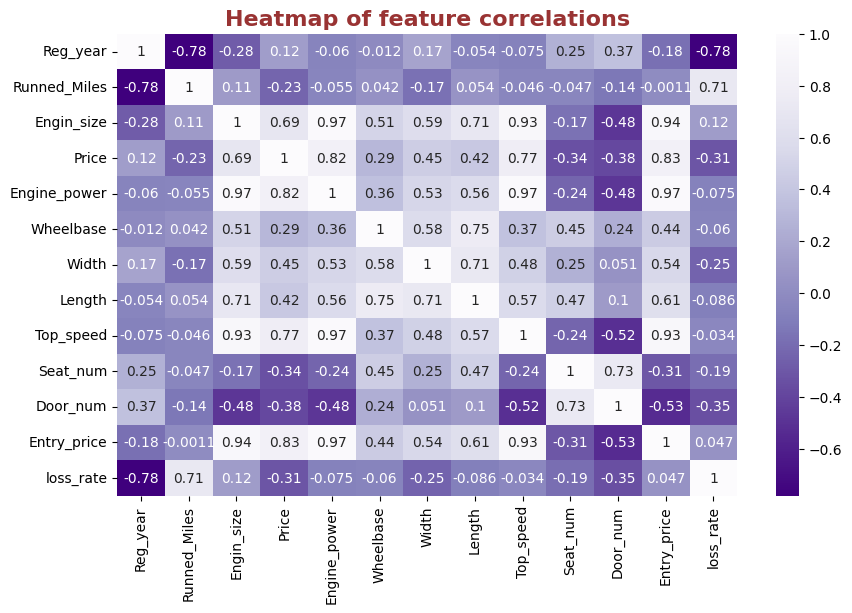

In [ ]:
correlation = infor2[['Reg_year','Runned_Miles','Engin_size','Price', 'Engine_power', 'Wheelbase', 'Width', 'Length', 'Top_speed', 'Seat_num', 'Door_num', 'Entry_price', 'loss_rate']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='Purples_r')

plt.title('Heatmap of feature correlations', fontsize=16, color="#993333", fontweight='bold')
plt.show()


Reg year và Runned Miles ảnh hưởng tới loss rate

#Numerical variables

##Reg year

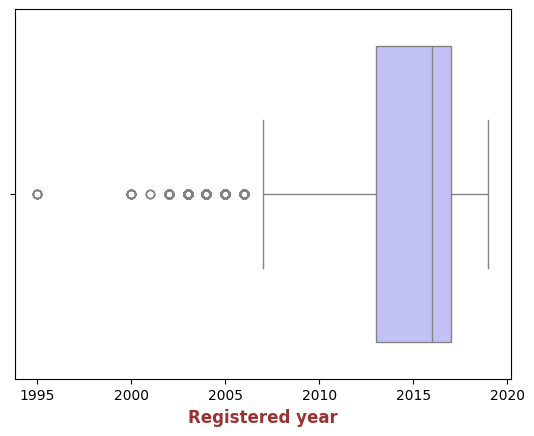

In [ ]:
sns.boxplot(x=infor2['Reg_year'], color = '#b8b8ff')
#plt.title('Prices of vehicle segments', fontsize=16, color="#993333", fontweight='bold')
plt.xticks(fontsize=10)
#plt.xlabel('')
plt.xlabel('Registered year', fontsize=12, color="#993333", fontweight='bold')
plt.show()


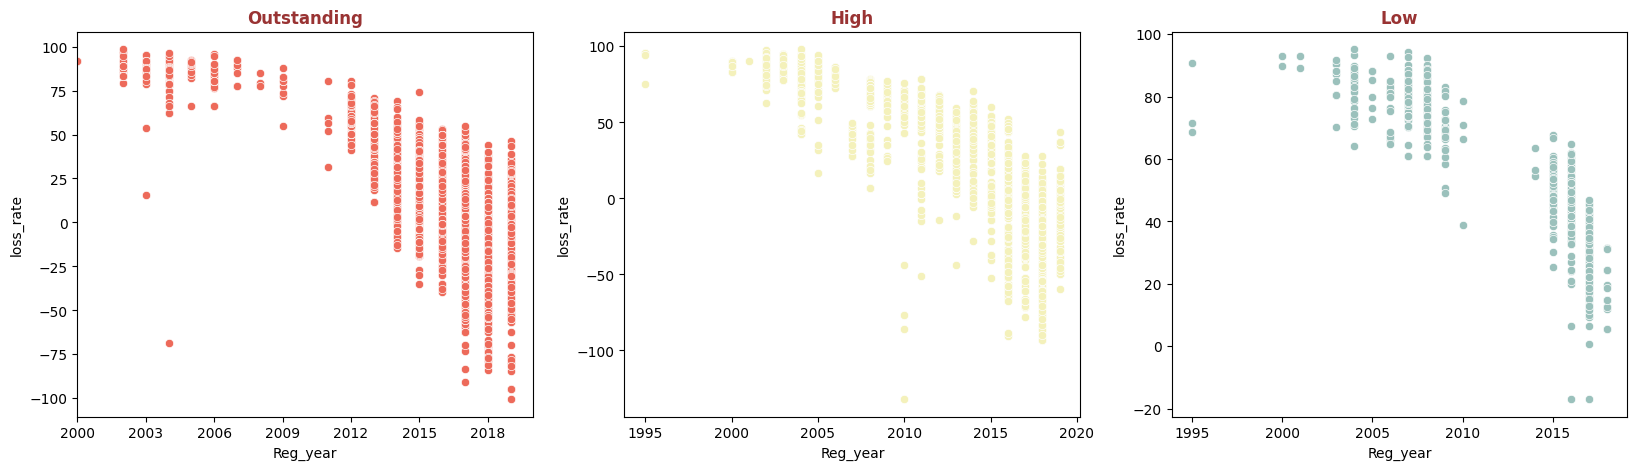

In [ ]:
mfig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(data=infor2[infor2['classify']=='outstanding'], x='Reg_year', y='loss_rate', color = '#ed6a5a', ax = axs[0] )
axs[0].set_title('Outstanding', fontweight='bold', color="#993333")
axs[0].set_xlim(2000,2020)
axs[0].set_xticks(range(2000,2020, 3))


sns.scatterplot(data=infor2[infor2['classify']=='high'], x='Reg_year', y='loss_rate', color= '#f4f1bb',  ax=axs[1])
axs[1].set_title('High', fontweight='bold', color="#993333")


sns.scatterplot(data=infor2[infor2['classify']=='low'], x='Reg_year', y='loss_rate',  color= '#9bc1bc', ax=axs[2])
axs[2].set_title('Low', fontweight='bold', color="#993333")


plt.show()


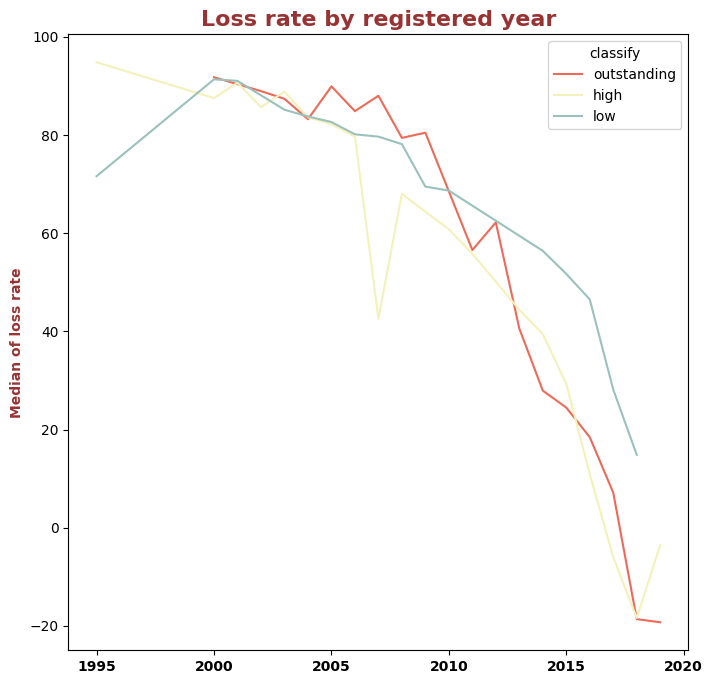

In [ ]:
plt.figure(figsize=(8,8))
order = ['outstanding', 'high', 'low']
sns.lineplot(infor2.groupby(['classify', 'Reg_year'])['loss_rate'].median().reset_index(name='Median of loss rate'), x='Reg_year', y='Median of loss rate', hue= 'classify',hue_order=order,palette= ['#ed6a5a','#f4f1bb','#9bc1bc'])

plt.title('Loss rate by registered year', fontsize=16, color="#993333", fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('Median of loss rate', fontsize=10, color="#993333", fontweight='bold')
plt.show()

##Runned miles

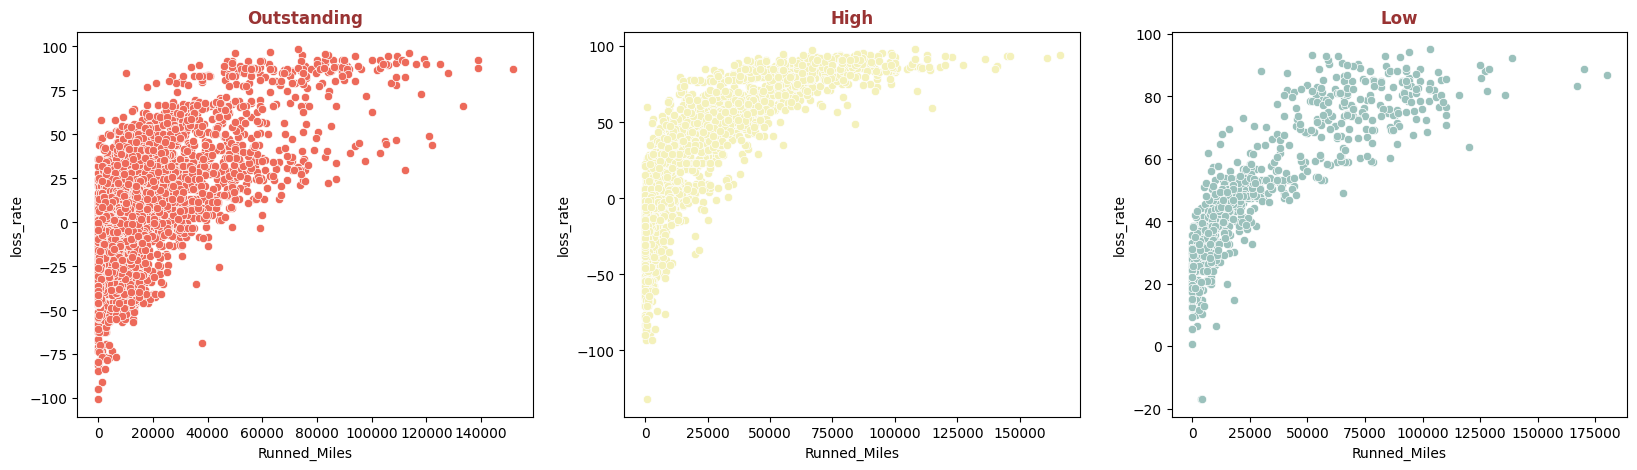

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(data=infor2[infor2['classify']=='outstanding'], x='Runned_Miles', y='loss_rate', color = '#ed6a5a', ax = axs[0] )
axs[0].set_title('Outstanding', fontweight='bold', color="#993333")


sns.scatterplot(data=infor2[infor2['classify']=='high'], x='Runned_Miles', y='loss_rate', color= '#f4f1bb',  ax=axs[1])
axs[1].set_title('High', fontweight='bold', color="#993333")

sns.scatterplot(data=infor2[infor2['classify']=='low'], x='Runned_Miles', y='loss_rate',  color= '#9bc1bc', ax=axs[2])
axs[2].set_title('Low', fontweight='bold', color="#993333")
plt.show()

##Engine size

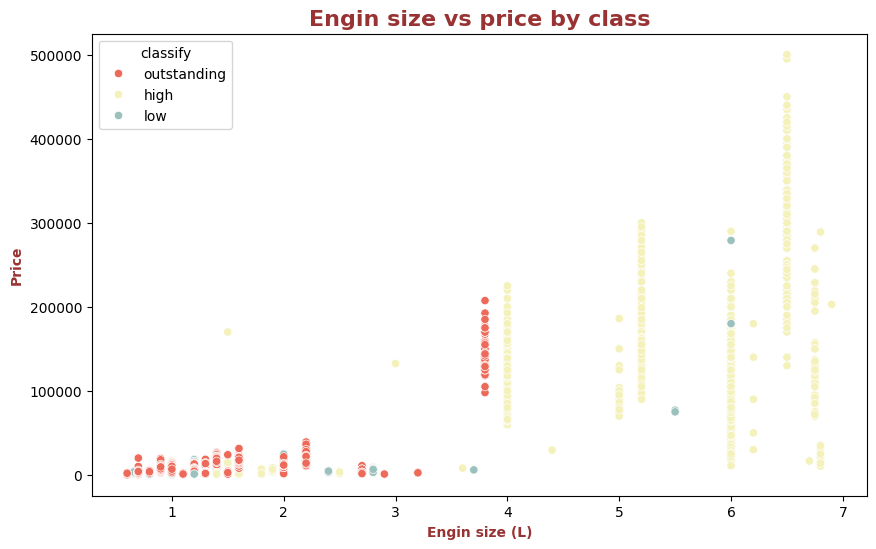

In [ ]:
# Assuming 'infor2' is your DataFrame
plt.figure(figsize=(10, 6))
order = ['outstanding', 'high', 'low']
sns.scatterplot(data=infor2, x='Engin_size', y='Price', hue='classify',hue_order=order, palette= ['#ed6a5a','#f4f1bb','#9bc1bc'] )

plt.title('Engin size vs price by class', fontsize=16, color="#993333", fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Engin size (L)', fontsize=10, color="#993333", fontweight='bold')
plt.ylabel('Price', fontsize=10, color="#993333", fontweight='bold')
plt.show()

##Engin power

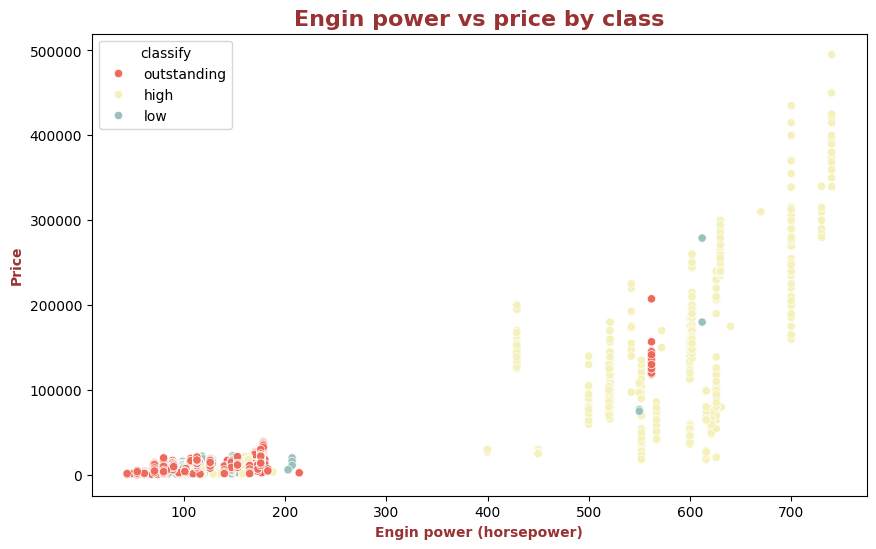

In [ ]:
plt.figure(figsize=(10, 6))
order = ['outstanding', 'high', 'low']
sns.scatterplot(data=infor2, x='Engine_power', y='Price', hue='classify',hue_order=order, palette= ['#ed6a5a','#f4f1bb','#9bc1bc'] )

plt.title('Engin power vs price by class', fontsize=16, color="#993333", fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Engin power (horsepower)', fontsize=10, color="#993333", fontweight='bold')
plt.ylabel('Price', fontsize=10, color="#993333", fontweight='bold')
plt.show()

##Top speed

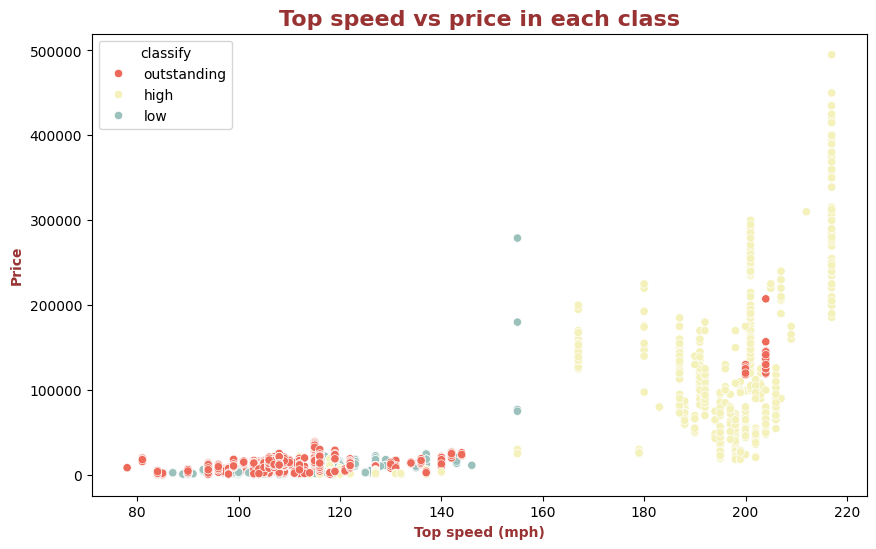

In [ ]:
plt.figure(figsize=(10, 6))
order = ['outstanding', 'high', 'low']
sns.scatterplot(data=infor2, x='Top_speed', y='Price', hue='classify',hue_order=order, palette= ['#ed6a5a','#f4f1bb','#9bc1bc'] )

plt.title('Top speed vs price in each class', fontsize=16, color="#993333", fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Top speed (mph)', fontsize=10, color="#993333", fontweight='bold')
plt.ylabel('Price', fontsize=10, color="#993333", fontweight='bold')
plt.show()

#Anova

In [ ]:
infor2.columns

Index(['Maker', 'Genmodel', 'Genmodel_ID', 'Adv_ID', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Engine_power', 'Annual_Tax',
       'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', 'Top_speed',
       'Seat_num', 'Door_num', 'Entry_price', 'loss_rate', 'classify'],
      dtype='object')

In [ ]:
df = infor2.copy()

In [ ]:
df.fillna('Unknown', inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6308 entries, 0 to 161132
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Maker         6308 non-null   object 
 1   Genmodel      6308 non-null   object 
 2   Genmodel_ID   6308 non-null   object 
 3   Adv_ID        6308 non-null   object 
 4   Adv_year      6308 non-null   int64  
 5   Adv_month     6308 non-null   int64  
 6   Color         6308 non-null   object 
 7   Reg_year      6308 non-null   float64
 8   Bodytype      6308 non-null   object 
 9   Runned_Miles  6308 non-null   object 
 10  Engin_size    6308 non-null   object 
 11  Gearbox       6308 non-null   object 
 12  Fuel_type     6308 non-null   object 
 13  Price         6308 non-null   float64
 14  Engine_power  6308 non-null   object 
 15  Annual_Tax    6308 non-null   object 
 16  Wheelbase     6308 non-null   object 
 17  Height        6308 non-null   object 
 18  Width         6308 non-nul

In [ ]:
categorical_vars = ['Color', 'Bodytype', 'Gearbox', 'Fuel_type', 'classify']
for categorical_var in categorical_vars:
  # Drop missing values
    df_no_na = infor2[[categorical_var, 'loss_rate']].dropna()
    categories = df_no_na[categorical_var].unique()
    category_groups = [df_no_na.loc[df_no_na[categorical_var]==category, 'loss_rate'] for category in categories]

    fvalue, pvalue = stats.f_oneway(*category_groups)
    print(f'For variable {categorical_var}:')
    print('F-value:', fvalue, '\nP-value:', pvalue, '\n')


For variable Color:
F-value: 24.260922263197507 
P-value: 2.5086943835340415e-74 

For variable Bodytype:
F-value: 186.43044985721906 
P-value: 7.857884327e-315 

For variable Gearbox:
F-value: 34.7700045255638 
P-value: 9.600870439712458e-16 

For variable Fuel_type:
F-value: 60.27362575953891 
P-value: 1.567514637332487e-61 

For variable classify:
F-value: 408.976290690261 
P-value: 9.91816703289858e-168 



The results you’re seeing are from an ANOVA (Analysis of Variance) test. Here’s what each part means:

F-value: This is the result of your ANOVA test statistic. It’s a ratio of the variance between the groups to the variance within the groups. A higher F-value indicates that the means across your groups are more different than you’d expect by chance.
P-value: This is the probability of getting an F-value as extreme as, or more extreme than, the one you got if the null hypothesis is true. The null hypothesis in this case is that the means of all your groups are equal. A small p-value (usually less than 0.05) leads us to reject the null hypothesis.
Looking at your results:

For the variable ‘Color’, ‘Bodytype’, ‘Gearbox’, and ‘Fuel_type’, the F-values are quite high and the p-values are 0.0, which suggests that these variables have a significant effect on the ‘loss_rate’.
For the variable ‘classify’, the F-value is extremely high and the p-value is also 0.0, which suggests a very strong relationship with the ‘loss_rate’.

# Categorical variables

##Body type of each class

In [ ]:
infor2

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num,Entry_price,loss_rate,classify
0,bentley,arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000.0,...,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,87.67,high
1,bentley,arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000.0,...,1515.0,2125.0,5390.0,13.7,179.0,5.0,4.0,174400,83.51,high
2,bentley,arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000.0,...,1515.0,2125.0,5390.0,14.7,155.0,5.0,4.0,174400,82.80,high
3,bentley,arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000.0,...,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,79.96,high
4,bentley,arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652.0,...,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,84.77,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161128,ssangyong,turismo,85_9,85_9$$51,2018,5,Black,2017.0,MPV,16110.0,...,1850.0,2365.0,5130.0,36.2,116.0,7.0,5.0,19625,-11.85,outstanding
161129,ssangyong,turismo,85_9,85_9$$52,2018,4,White,2015.0,MPV,31404.0,...,1850.0,2365.0,5130.0,36.2,108.0,7.0,5.0,19625,41.41,outstanding
161130,ssangyong,turismo,85_9,85_9$$53,2018,3,Red,2016.0,MPV,21951.0,...,1850.0,2365.0,5130.0,39.2,116.0,7.0,5.0,19625,28.66,outstanding
161131,ssangyong,turismo,85_9,85_9$$54,2018,5,White,2014.0,MPV,49925.0,...,1850.0,2365.0,5130.0,36.2,108.0,7.0,5.0,19625,41.90,outstanding


In [ ]:
infor2.groupby(['Bodytype','classify'])['loss_rate'].mean()

Bodytype     classify   
Convertible  high           43.701375
             low            75.050000
             outstanding    37.230120
Coupe        high           32.149361
             outstanding    34.974826
Estate       high          -14.152500
             outstanding   -10.011591
Hatchback    high            9.309171
             low            44.775604
             outstanding    20.971151
Limousine    low            47.517500
MPV          low            76.381111
             outstanding    16.726866
Panel Van    outstanding    38.526667
Pickup       outstanding   -26.043571
SUV          high           -8.711273
             low            73.749783
             outstanding    -3.255977
Saloon       high           66.746931
             low            81.985714
             outstanding    -4.080000
Name: loss_rate, dtype: float64

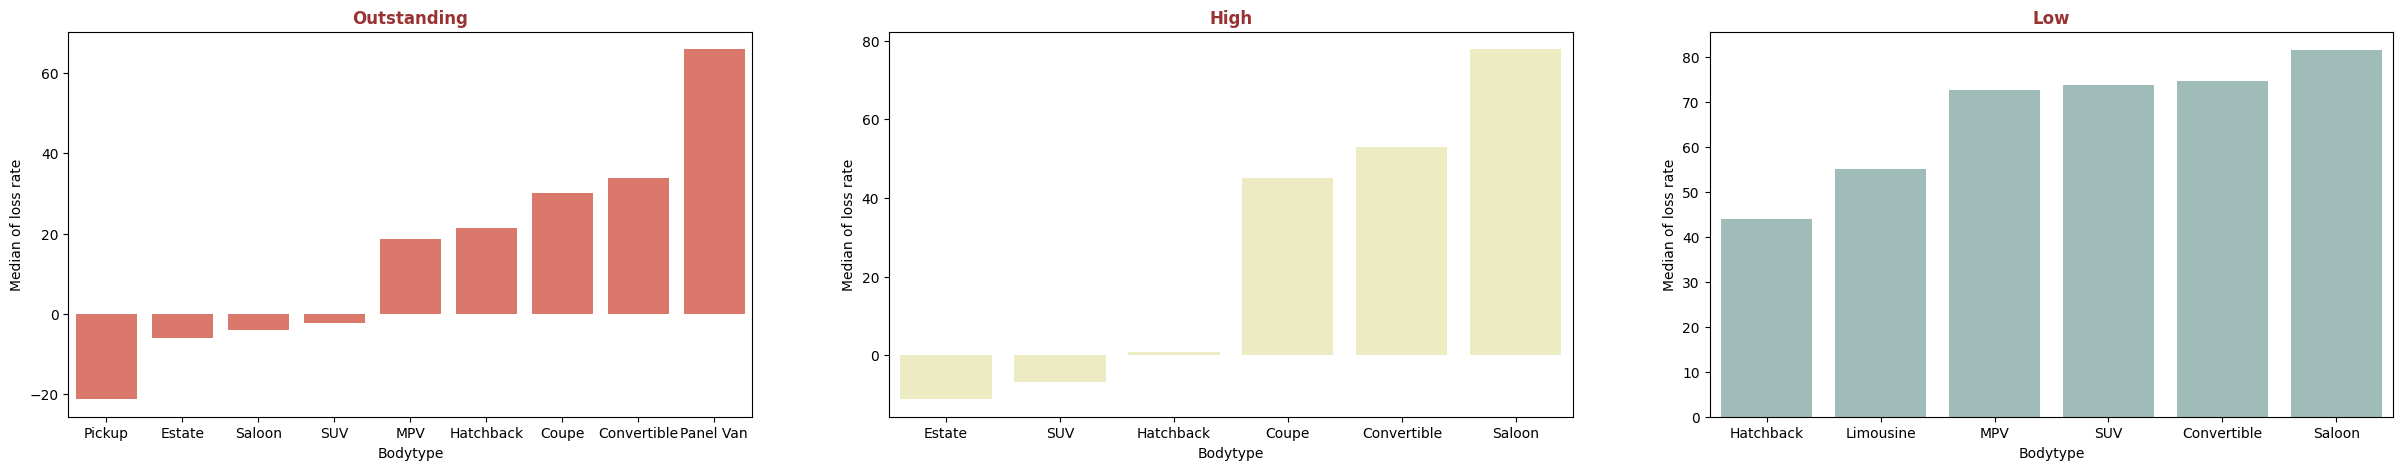

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

plot = infor2[infor2['classify']=='outstanding'].groupby('Bodytype')['loss_rate'].median().sort_values().reset_index(name='Median of loss rate')
sns.barplot(x='Bodytype', y='Median of loss rate', data=plot, errorbar=None, ax=axs[0], color = '#ed6a5a')
axs[0].set_title('Outstanding', fontweight='bold', color="#993333")

sns.barplot(x='Bodytype', y='Median of loss rate', data=infor2[infor2['classify']=='high'].groupby('Bodytype')['loss_rate'].median().sort_values().reset_index(name='Median of loss rate'), errorbar=None, color= '#f4f1bb',  ax=axs[1])
axs[1].set_title('High', fontweight='bold', color="#993333")

sns.barplot(x='Bodytype', y='Median of loss rate', data=infor2[infor2['classify']=='low'].groupby('Bodytype')['loss_rate'].median().sort_values().reset_index(name='Median of loss rate'), errorbar=None, color= '#9bc1bc', ax=axs[2])
axs[2].set_title('Low', fontweight='bold', color="#993333")
plt.show()


- Đối với các dòng xe tăng trưởng vượt bậc, mẫu pickup có thể mang lại lơi nhuận đến hơn 20%
- Đối với các hãng xe tăng trưởng cao, các dòng xe Estate và SUV có thể mang lại lợi nhuận 7-10%

##Color

<ipython-input-65-1030a7765bd8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(plot, x='Median of loss rate', y = 'Color',palette=cpal)
<ipython-input-65-1030a7765bd8>:5: UserWarning: The palette list has more values (50) than needed (18), which may not be intended.
  sns.barplot(plot, x='Median of loss rate', y = 'Color',palette=cpal)


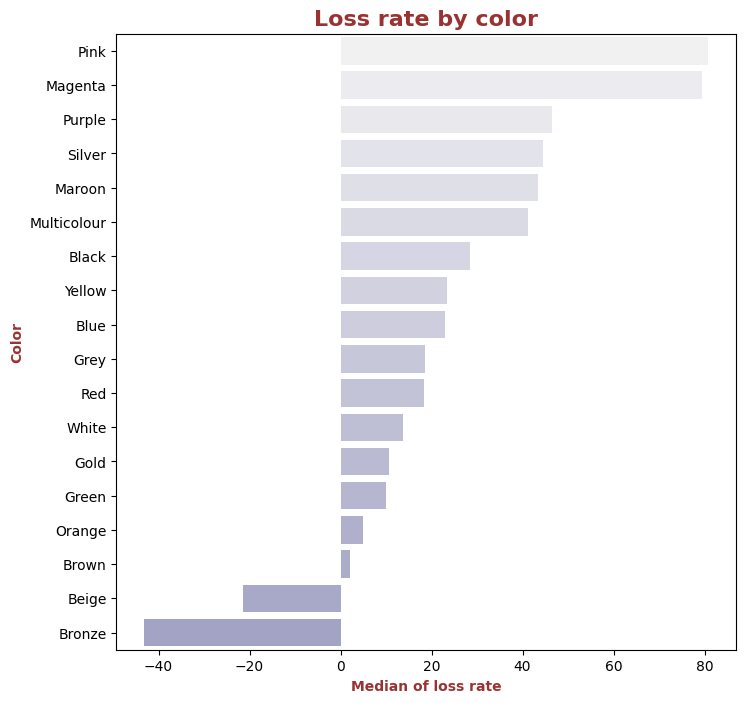

In [ ]:
plt.figure(figsize=(8,8))
plot = infor2.groupby('Color')['loss_rate'].median().sort_values(ascending = False).reset_index(name= 'Median of loss rate')
cmap = sns.light_palette("navy", as_cmap=True)
cpal = [cmap(i) for i in np.linspace(0, 1)]
sns.barplot(plot, x='Median of loss rate', y = 'Color',palette=cpal)

plt.title('Loss rate by color', fontsize=16, color="#993333", fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Median of loss rate', fontsize=10, color="#993333", fontweight='bold')
plt.ylabel('Color', fontsize=10, color="#993333", fontweight='bold')
plt.show()

In [ ]:
#loss rate by color and class
df1 = infor2.groupby(['classify','Color'])['loss_rate'].mean().reset_index()

#split into 3 dfs
high = df1[df1['classify']=='high']
low = df1[df1['classify']=='low']
ost = df1[df1['classify']=='outstanding']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'White'),
  Text(1.5, 0, 'Grey'),
  Text(2.5, 0, 'Yellow'),
  Text(3.5, 0, 'Purple'),
  Text(4.5, 0, 'Black'),
  Text(5.5, 0, 'Green'),
  Text(6.5, 0, 'Red'),
  Text(7.5, 0, 'Multicolour'),
  Text(8.5, 0, 'Orange'),
  Text(9.5, 0, 'Gold'),
  Text(10.5, 0, 'Blue'),
  Text(11.5, 0, 'Silver')])

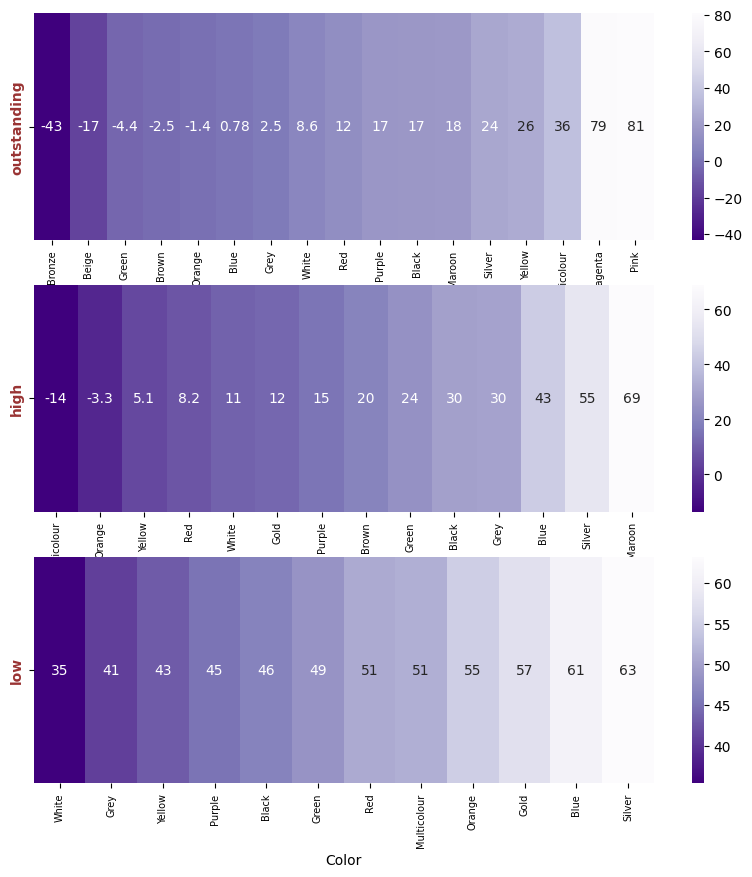

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(311)
sns.heatmap(ost.sort_values(by = 'loss_rate').pivot(index='classify', columns = 'Color', values = 'loss_rate').sort_values(by ='outstanding', axis = 1), annot=True, cmap='Purples_r')
plt.ylabel('')
plt.yticks(fontsize=10, color="#993333", fontweight='bold')
plt.xticks(fontsize=7)

plt.subplot(312)
sns.heatmap(high.sort_values(by = 'loss_rate').pivot(index='classify', columns = 'Color', values = 'loss_rate').sort_values(by ='high', axis = 1), annot=True, cmap='Purples_r')
plt.ylabel('')
plt.yticks(fontsize=10, color="#993333", fontweight='bold')
plt.xticks(fontsize=7)

plt.subplot(313)
sns.heatmap(low.sort_values(by = 'loss_rate').pivot(index='classify', columns = 'Color', values = 'loss_rate').sort_values(by ='low', axis = 1), annot=True, cmap='Purples_r')
plt.ylabel('')
plt.yticks(fontsize=10, color="#993333", fontweight='bold')
plt.xticks(fontsize=7)

##**Gearbox**

In [ ]:
infor2['Gearbox'].unique()

array(['Automatic', 'Semi-Automatic', 'Manual', nan], dtype=object)

In [ ]:
infor2.groupby(['classify','Gearbox'])['loss_rate'].median()

classify     Gearbox       
high         Automatic         42.11
             Manual            17.51
             Semi-Automatic   -19.68
low          Automatic         50.05
             Manual            47.51
outstanding  Automatic         13.90
             Manual            11.50
             Semi-Automatic    18.67
Name: loss_rate, dtype: float64

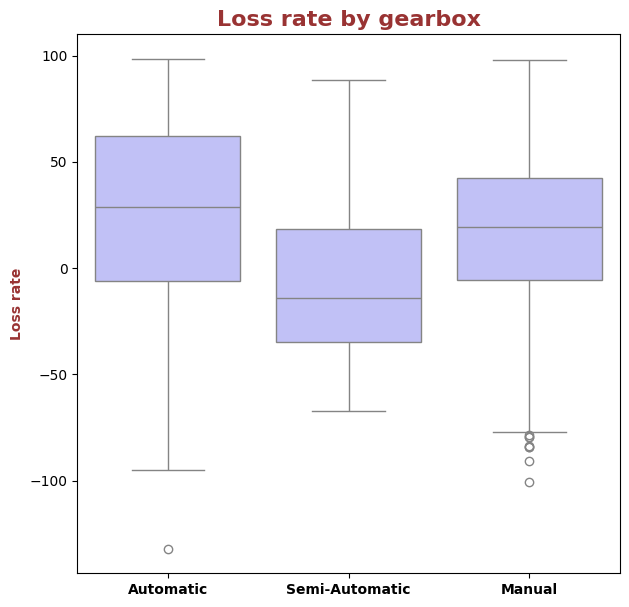

In [ ]:
plt.figure(figsize=(7, 7))
order = ['on top', 'high', 'low']
sns.boxplot(x='Gearbox', y='loss_rate', data=infor2, color ='#b8b8ff')
plt.title('Loss rate by gearbox')

plt.title('Loss rate by gearbox', fontsize=16, color="#993333", fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('', fontsize=10, color="#993333", fontweight='bold')
plt.ylabel('Loss rate', fontsize=10, color="#993333", fontweight='bold')
plt.show()

In [ ]:
infor2.groupby(['Gearbox', 'classify'])['loss_rate'].mean().reset_index(name='Mean of loss rate')

,Gearbox,classify,Mean of loss rate
0,Automatic,high,29.821971
1,Automatic,low,51.322000
2,Automatic,outstanding,17.077173
3,Manual,high,28.640989
4,Manual,low,48.831021
5,Manual,outstanding,7.464791
6,Semi-Automatic,high,-15.068065
7,Semi-Automatic,outstanding,33.721429


<Axes: xlabel='Engin_size', ylabel='Price'>

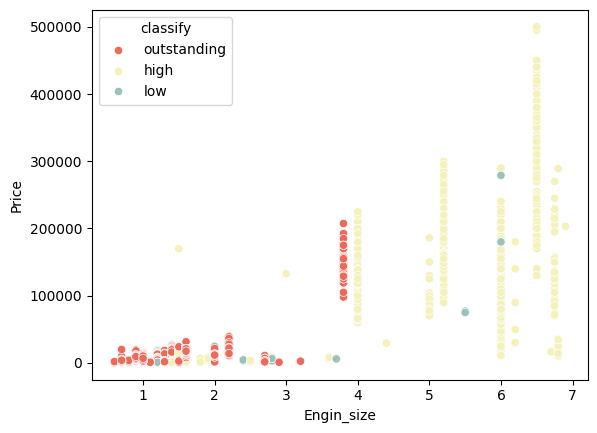

In [ ]:
order = ['outstanding', 'high', 'low']
sns.scatterplot(data=infor2, x='Engin_size', y='Price', hue='classify',hue_order=order, palette= ['#ed6a5a','#f4f1bb','#9bc1bc'] )

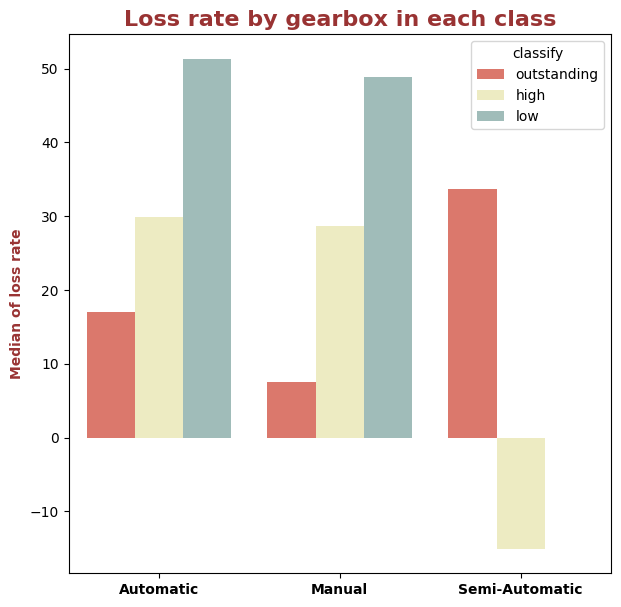

In [ ]:
plt.figure(figsize=(7, 7))
order = ['outstanding', 'high', 'low']
sns.barplot(infor2.groupby(['Gearbox', 'classify'])['loss_rate'].mean().reset_index(name='Mean of loss rate'), x= 'Gearbox', y='Mean of loss rate', hue ='classify', hue_order=order, palette= ['#ed6a5a','#f4f1bb','#9bc1bc'])

plt.title('Loss rate by gearbox in each class', fontsize=16, color="#993333", fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('', fontsize=10, color="#993333", fontweight='bold')
plt.ylabel('Median of loss rate', fontsize=10, color="#993333", fontweight='bold')
plt.show()

Quá nhiều outliers có thể là nguyên nhân dẫn đến vấn đề khi tính mean/median

In [ ]:
def remove_outliers(df, class_column, value_column):
    # Create an empty DataFrame to store the result
    result = pd.DataFrame()

    # Get the unique classes
    unique_classes = df[class_column].unique()

    for unique_class in unique_classes:
        # Get the data for the current class
        class_data = df[df[class_column] == unique_class]

        # Calculate the IQR of the class data
        Q1 = class_data[value_column].quantile(0.25)
        Q3 = class_data[value_column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        filtered_data = class_data[(class_data[value_column] >= lower_bound) & (class_data[value_column] <= upper_bound)]

        # Append the filtered data to the result DataFrame
        result = pd.concat([result, filtered_data], ignore_index=True)

    return result
gear_box = remove_outliers(infor2, 'Gearbox', 'loss_rate')

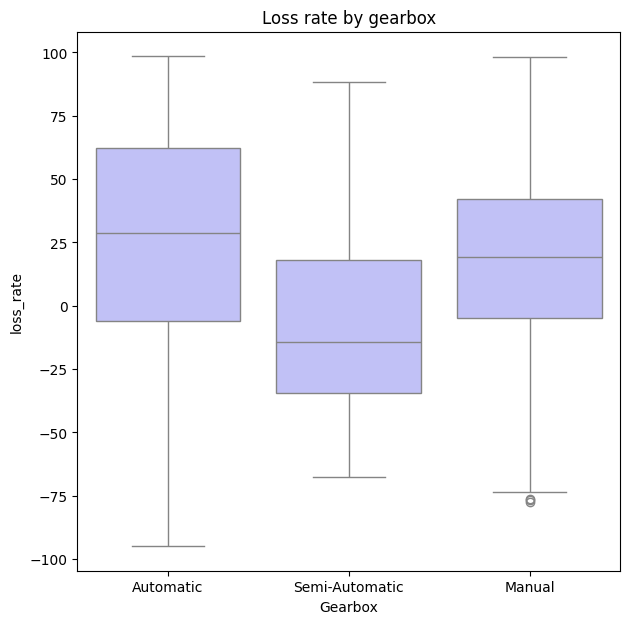

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(x='Gearbox', y='loss_rate', data=gear_box, color = '#b8b8ff')
plt.title('Loss rate by gearbox')



plt.show()

Text(0.5, 1.0, 'Loss rate by gearbox')

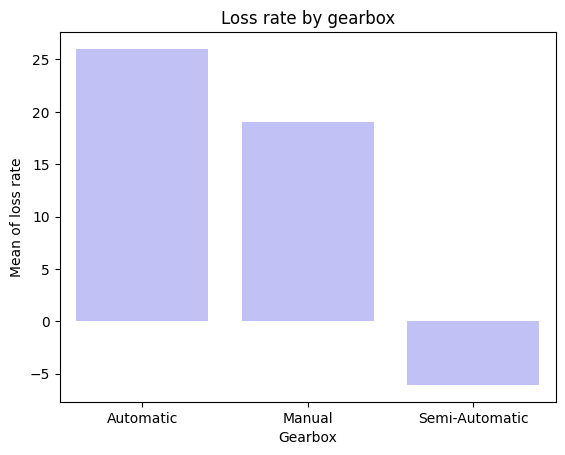

In [ ]:
sns.barplot(infor2.groupby(['Gearbox'])['loss_rate'].mean().reset_index(name='Mean of loss rate'), x= 'Gearbox', y='Mean of loss rate', color='#b8b8ff')
plt.title('Loss rate by gearbox')

##Fuel type

In [ ]:
infor2['Fuel_type'].unique()

array(['Petrol', 'Diesel', 'Petrol Plug-in Hybrid', 'Petrol Ethanol', nan,
       'Bi Fuel', 'Electric'], dtype=object)

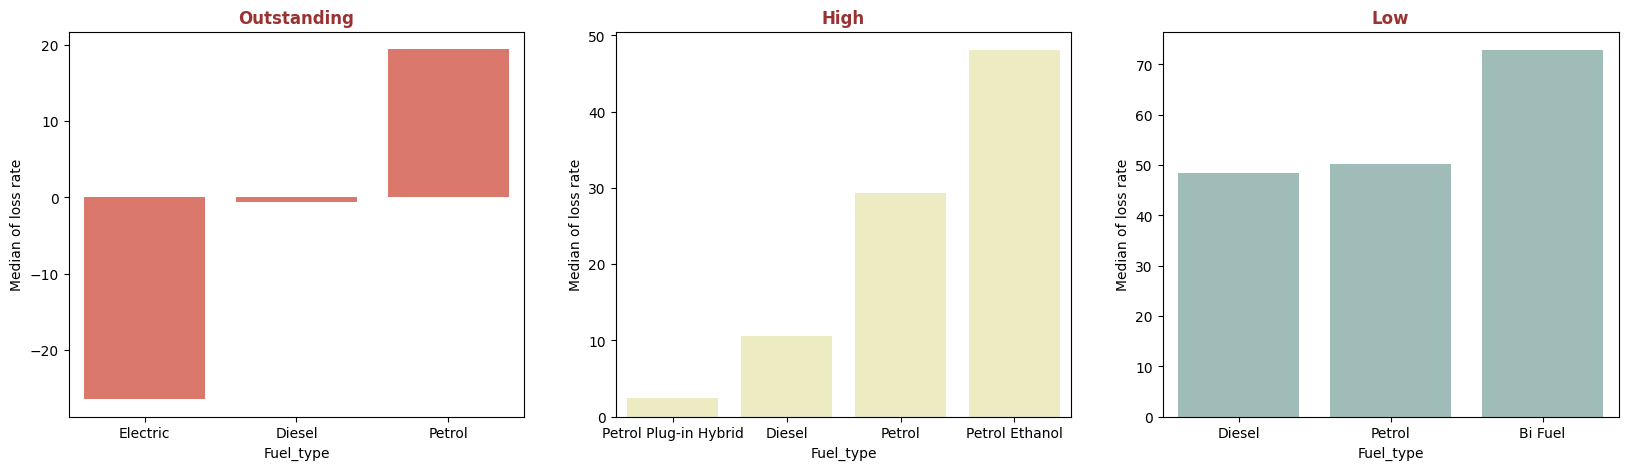

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

plot = infor2[infor2['classify']=='outstanding'].groupby('Fuel_type')['loss_rate'].mean().sort_values().reset_index(name='Median of loss rate')
sns.barplot(x='Fuel_type', y='Median of loss rate', data=plot, errorbar=None, color= '#ed6a5a', ax=axs[0])
axs[0].set_title('Outstanding', fontweight='bold', color="#993333")

sns.barplot(x='Fuel_type', y='Median of loss rate', data=infor2[infor2['classify']=='high'].groupby('Fuel_type')['loss_rate'].mean().sort_values().reset_index(name='Median of loss rate'), errorbar=None, color = '#f4f1bb', ax=axs[1])
axs[1].set_title('High', fontweight='bold', color="#993333")

sns.barplot(x='Fuel_type', y='Median of loss rate', data=infor2[infor2['classify']=='low'].groupby('Fuel_type')['loss_rate'].mean().sort_values().reset_index(name='Median of loss rate'), errorbar=None,color = '#9bc1bc', ax=axs[2])
axs[2].set_title('Low', fontweight='bold', color="#993333")
plt.show()


#App demo by streamlit

In [ ]:
features = ['Maker', 'Genmodel', 'Genmodel_ID', 'Runned_Miles', 'Engin_size', 'Engine_power', 'Height','Length', 'Top_speed', 'Entry_price', 'loss_rate']
X = infor[features]
y = infor['Price']
# Cho phép người dùng nhập giá trị cho các đặc trưng
input_values = {}
inp= ['bentley', 'arnage', '10_1', 60000, 6.8, 450, 1515, 5390, 179, 174400, 87.67]
for i in range(len(features)):
    input_values[features[i]] = inp[i]

# Dự đoán giá trị y dựa trên giá trị đặc trưng được nhập
input_df = pd.DataFrame(data = input_values, index=[0])
tam = pd.concat([X, input_df], axis=0)
# Chuyển đổi các categorical feature thành dạng số
categorical_features = ['Maker', 'Genmodel', 'Genmodel_ID']
enc = OrdinalEncoder()
tam[categorical_features] = enc.fit_transform(tam[categorical_features])
for column in list(tam.columns):
    tam[column] = preprocessing.MinMaxScaler().fit_transform(tam[column].values.reshape(-1,1))
X = tam.iloc[:-1, :].reset_index(drop=True)
y = y.reset_index(drop=True)
# Xây dựng mô hình logistic regression
lr = LinearRegression()
lr.fit(X, y)
predicted_y = lr.predict(pred_value)

# Hiển thị kết quả dự đoán
print(f'Giá trị dự đoán: {predicted_y[0]}')

In [ ]:
%%writefile my_code.py

import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Tạo ứng dụng web với Streamlit
st.title('Ứng dụng dự đoán giá')

# Đọc dữ liệu
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1QeotRrObPhzBpN0gJMP8YkWUaQXu51BxXY6tpQPhlwA/export?format=csv', index_col= 0)
df.dropna(inplace= True)

# Chọn các feature cần thiết
list_inp_value = []
# Tạo selectbox cho 'Maker'
makers = df['Maker'].unique().tolist()
selected_maker = st.selectbox('Chọn hãng xe:', makers)
list_inp_value.append(selected_maker)

# Lọc dataframe theo 'Maker' đã chọn
filtered_df = df[df['Maker'] == selected_maker]

# Tạo selectbox cho 'genmodel'
genmodels = filtered_df['Genmodel'].unique().tolist()
selected_genmodel = st.selectbox('Chọn genmodel:', genmodels)
list_inp_value.append(selected_genmodel)

# Nhập các features từ bàn phím
runned_miles = st.number_input('Nhập Runned_Miles:')
list_inp_value.append(runned_miles)
engin_size = st.number_input('Nhập Engin_size:')
list_inp_value.append(engin_size)
engine_power = st.number_input('Nhập Engine_power:')
list_inp_value.append(engine_power)
height = st.number_input('Nhập Height:')
list_inp_value.append(height)
length = st.number_input('Nhập Length:')
list_inp_value.append(length)
top_speed = st.number_input('Nhập Top_speed:')
list_inp_value.append(top_speed)

# Tính trung bình cộng 'Entry_price' và 'loss_rate'
mean_entry_price = df.groupby(['Maker', 'Genmodel'])['Entry_price'].mean().loc[selected_maker, selected_genmodel]
list_inp_value.append(mean_entry_price)
mean_loss_rate = df.groupby(['Maker', 'Genmodel'])['loss_rate'].mean().loc[selected_maker, selected_genmodel]
list_inp_value.append(mean_entry_price)


features = ['Maker', 'Genmodel', 'Runned_Miles', 'Engin_size', 'Engine_power', 'Height','Length', 'Top_speed', 'Entry_price', 'loss_rate']
X = df[features]
y = df['Price']

# Cho phép người dùng nhập giá trị cho các đặc trưng
input_values = {}
for i in range(len(features)):
    input_values[features[i]] = list_inp_value[i]

# Convert input to df
input_df = pd.DataFrame(data = input_values, index=[0])
tam = pd.concat([X, input_df], axis=0)

# Chuyển đổi các categorical feature thành dạng số
categorical_features = ['Maker', 'Genmodel']
enc = OrdinalEncoder()
tam[categorical_features] = enc.fit_transform(tam[categorical_features])

# Thực hiện chuẩn hóa Min-Max cho mỗi cột
scaler = MinMaxScaler()
for column in list(tam.columns):
    tam[column] = scaler.fit_transform(tam[column].values.reshape(-1,1))

X = tam.iloc[:-1, :].reset_index(drop=True)
y = y.reset_index(drop=True)

# Xây dựng mô hình logistic regression
lr = LinearRegression()
lr.fit(X, y)


# Dự đoán giá trị y dựa trên giá trị đặc trưng được nhập
pred_value = tam.tail(1)
predicted_y = lr.predict(pred_value)

# Hiển thị kết quả dự đoán
if predicted_y[0] > 0:
  st.write(f'Giá trị dự đoán: {predicted_y[0]}')
else:
  st.write(f'Giá trị dự đoán: {predicted_y[0]*-1}')

Writing my_code.py


In [ ]:
# @title Install neccessary packages
# Install streamlit and ngrok. Need to do once only.
! pip install pyngrok
!pip install -q streamlit
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

# Run streamlit in the background
!streamlit run /content/my_code.py &>/dev/null&

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.12.0 which is incompatible.
--2024-03-28 07:50:01--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.e

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2crWsYXFtIWLnmdM0yy0xQsdtOX_4WJ2WaDih4FxN5U7MMeqc") #ngrok.com
ngrok.connect(8501)

<NgrokTunnel: "https://8af6-34-123-240-88.ngrok-free.app" -> "http://localhost:8501">

#Final model

##Import library

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
from sklearn import preprocessing

In [ ]:
infor = pd.read_csv('https://docs.google.com/spreadsheets/d/1QeotRrObPhzBpN0gJMP8YkWUaQXu51BxXY6tpQPhlwA/export?format=csv', index_col= 0)
infor.dropna(inplace= True)

In [ ]:
infor.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num,Entry_price,loss_rate
0,bentley,arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000.0,...,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,87.67
1,bentley,arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000.0,...,3116.0,1515.0,2125.0,5390.0,13.7,179.0,5.0,4.0,174400,83.51
2,bentley,arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000.0,...,3116.0,1515.0,2125.0,5390.0,14.7,155.0,5.0,4.0,174400,82.80
3,bentley,arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000.0,...,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,79.96
4,bentley,arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652.0,...,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0,174400,84.77


##Encode

In [ ]:
# Chọn các feature cần thiết
features = ['Maker', 'Genmodel', 'Genmodel_ID', 'Runned_Miles', 'Engin_size', 'Engine_power', 'Height','Length', 'Top_speed', 'Entry_price', 'loss_rate']
X = infor[features]
y = infor['Price']

In [ ]:
X

,Maker,Genmodel,Genmodel_ID,Runned_Miles,Engin_size,Engine_power,Height,Length,Top_speed,Entry_price,loss_rate
1,bentley,arnage,10_1,44000.0,6.8,450.0,1515.0,5390.0,179.0,174400,83.51
2,bentley,arnage,10_1,55000.0,6.8,400.0,1515.0,5390.0,155.0,174400,82.80
5,bentley,arnage,10_1,55000.0,6.8,450.0,1515.0,5390.0,179.0,174400,85.69
11,bentley,arnage,10_1,52000.0,6.8,450.0,1515.0,5390.0,179.0,174400,84.52
13,bentley,arnage,10_1,58000.0,6.8,450.0,1515.0,5390.0,179.0,174400,85.12
...,...,...,...,...,...,...,...,...,...,...,...
229073,volvo,v50,96_9,140000.0,2.0,136.0,1457.0,4522.0,127.0,19375,83.56
229074,volvo,v50,96_9,158000.0,2.4,180.0,1457.0,4522.0,137.0,19375,84.57
229075,volvo,v50,96_9,94000.0,2.4,178.0,1457.0,4522.0,137.0,19375,78.06
229076,volvo,v50,96_9,111000.0,2.4,170.0,1452.0,4514.0,134.0,19375,85.06


In [ ]:
# Chuyển đổi các categorical feature thành dạng số
categorical_features = ['Maker', 'Genmodel', 'Genmodel_ID']
enc = OrdinalEncoder()
X_cat = enc.fit_transform(X[categorical_features])
X_cat =pd.DataFrame(X_cat, columns=categorical_features)

In [ ]:
# Kết hợp lại với các numerical feature
numerical_features = ['Runned_Miles', 'Engin_size', 'Engine_power', 'Height','Length', 'Top_speed', 'Entry_price', 'loss_rate']
X_num = X[numerical_features]
#X = pd.concat([X_cat, X_num], axis=1)

In [ ]:
X_num.reset_index(inplace=True)
X_num.drop(X_num.columns[0], axis=1, inplace=True)

<ipython-input-147-225f33e732aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num.drop(X_num.columns[0], axis=1, inplace=True)


In [ ]:
X = pd.concat([X_cat, X_num], axis=1)

In [ ]:
X

,Maker,Genmodel,Genmodel_ID,Runned_Miles,Engin_size,Engine_power,Height,Length,Top_speed,Entry_price,loss_rate
0,4.0,73.0,0.0,44000.0,6.8,450.0,1515.0,5390.0,179.0,174400,83.51
1,4.0,73.0,0.0,55000.0,6.8,400.0,1515.0,5390.0,155.0,174400,82.80
2,4.0,73.0,0.0,55000.0,6.8,450.0,1515.0,5390.0,179.0,174400,85.69
3,4.0,73.0,0.0,52000.0,6.8,450.0,1515.0,5390.0,179.0,174400,84.52
4,4.0,73.0,0.0,58000.0,6.8,450.0,1515.0,5390.0,179.0,174400,85.12
...,...,...,...,...,...,...,...,...,...,...,...
165361,53.0,468.0,520.0,140000.0,2.0,136.0,1457.0,4522.0,127.0,19375,83.56
165362,53.0,468.0,520.0,158000.0,2.4,180.0,1457.0,4522.0,137.0,19375,84.57
165363,53.0,468.0,520.0,94000.0,2.4,178.0,1457.0,4522.0,137.0,19375,78.06
165364,53.0,468.0,520.0,111000.0,2.4,170.0,1452.0,4514.0,134.0,19375,85.06


##normalize

In [ ]:
# Tạo một bản sao của dữ liệu để không làm thay đổi dữ liệu gốc
df_normalized = X.copy()

# Danh sách các cột cần chuẩn hóa
columns_to_normalize = list(X.columns)

# Thực hiện chuẩn hóa Min-Max cho mỗi cột
for column in columns_to_normalize:
    df_normalized[column] = preprocessing.MinMaxScaler().fit_transform(df_normalized[column].values.reshape(-1,1))

# Kết quả là 'df_normalized' sẽ chứa dữ liệu đã được chuẩn hóa


In [ ]:
df_normalized

,Maker,Genmodel,Genmodel_ID,Runned_Miles,Engin_size,Engine_power,Height,Length,Top_speed,Entry_price,loss_rate
0,0.075472,0.142578,0.0,0.006914,1.000000,0.583333,0.569549,0.788540,0.815534,0.538307,0.982349
1,0.075472,0.142578,0.0,0.008643,1.000000,0.511494,0.569549,0.788540,0.699029,0.538307,0.981565
2,0.075472,0.142578,0.0,0.008643,1.000000,0.583333,0.569549,0.788540,0.815534,0.538307,0.984757
3,0.075472,0.142578,0.0,0.008172,1.000000,0.583333,0.569549,0.788540,0.815534,0.538307,0.983465
4,0.075472,0.142578,0.0,0.009115,1.000000,0.583333,0.569549,0.788540,0.815534,0.538307,0.984127
...,...,...,...,...,...,...,...,...,...,...,...
165361,1.000000,0.914062,1.0,0.022001,0.225806,0.132184,0.547744,0.551705,0.563107,0.047132,0.982404
165362,1.000000,0.914062,1.0,0.024830,0.290323,0.195402,0.547744,0.551705,0.611650,0.047132,0.983520
165363,1.000000,0.914062,1.0,0.014772,0.290323,0.192529,0.547744,0.551705,0.611650,0.047132,0.976329
165364,1.000000,0.914062,1.0,0.017444,0.290323,0.181034,0.545865,0.549523,0.597087,0.047132,0.984061


##Linear regression testing

In [ ]:
y = y.reset_index(drop=True)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 3.718e+04
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:04:26   Log-Likelihood:            -1.7503e+06
No. Observations:              165366   AIC:                         3.501e+06
Df Residuals:                  165355   BIC:                         3.501e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.843e+04    328.697     86.490   

<ipython-input-36-79c0e9bff559>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


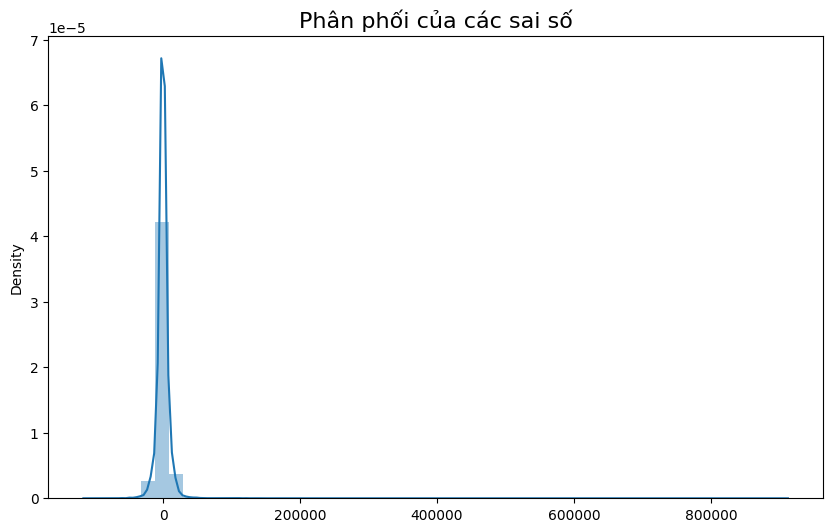

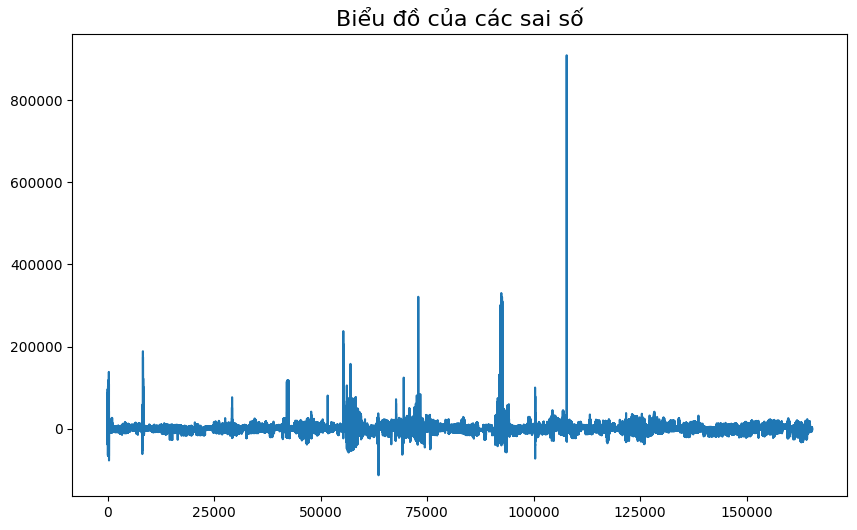

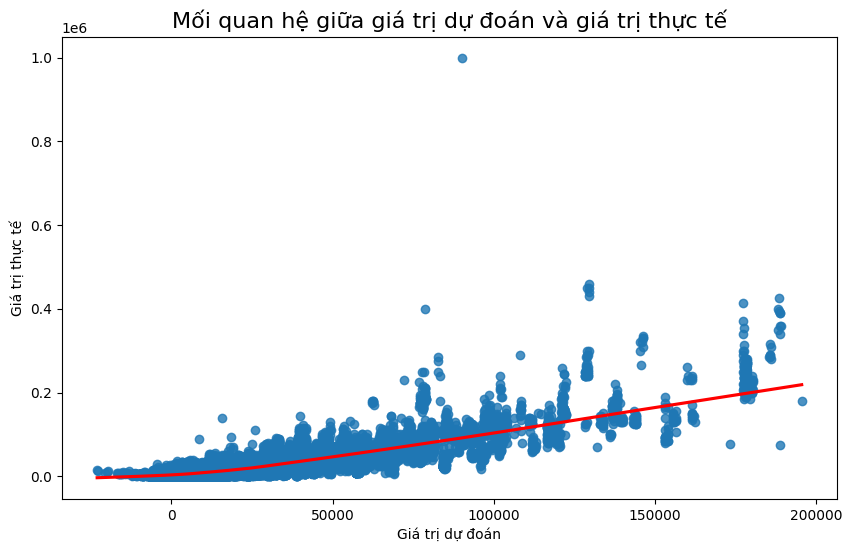

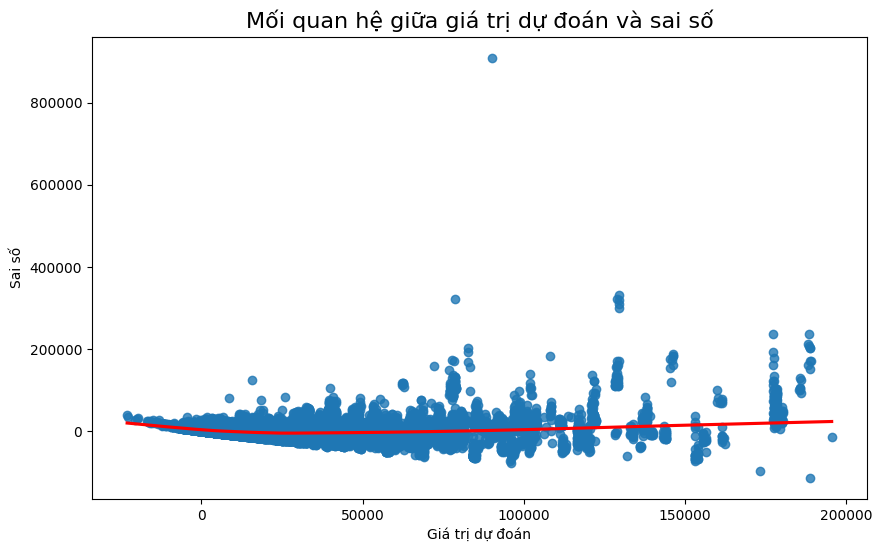

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Thêm hằng số vào mô hình
X = sm.add_constant(df_normalized)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X)
results = model.fit()

# In kết quả
print(results.summary())

# Kiểm định giả định về phân phối chuẩn của các sai số
residuals = results.resid
plt.figure(figsize=(10,6))
sns.distplot(residuals)
plt.title('Phân phối của các sai số', fontsize=16)
plt.show()

# Kiểm định giả định về tính độc lập của các sai số
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Biểu đồ của các sai số', fontsize=16)
plt.show()

# Kiểm định giả định về tính tuyến tính
fitted_values = results.predict()
plt.figure(figsize=(10,6))
sns.regplot(x=fitted_values, y=y, lowess=True, line_kws={'color': 'red'})
plt.title('Mối quan hệ giữa giá trị dự đoán và giá trị thực tế', fontsize=16)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực tế')
plt.show()

# Kiểm định giả định về đồng biến phương sai
plt.figure(figsize=(10,6))
sns.regplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Mối quan hệ giữa giá trị dự đoán và sai số', fontsize=16)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Sai số')
plt.show()


##Linear regression

In [ ]:
# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(df_normalized, y, test_size=0.2, random_state=41)

# Xây dựng mô hình logistic regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Dự đoán giá trên tập test
y_pred = lr.predict(X_test)

In [ ]:
lr.intercept_

280052.11476366606

In [ ]:
coeff_df = pd.DataFrame(lr.coef_, df_log_transformed.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Maker,11277.323447
Genmodel,-4541.319844
Genmodel_ID,-9035.234892
Color,1542.813446
Bodytype,-3636.117538
Fuel_type,-6055.373000
Engin_size,-155077.778769
Engine_power,217127.289553
Top_speed,-74151.039479
Entry_price,222033.404458


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np

In [ ]:
y_test.mean()

12069.576343955978

In [ ]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3533.1093895353347
Mean Squared Error: 43701719.175394274
Root Mean Squared Error: 6610.727582906005


In [ ]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
model_stats = sm.OLS(y_train.values.reshape(-1, 1), X2).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 6.370e+04
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:34:15   Log-Likelihood:            -1.3576e+06
No. Observations:              132292   AIC:                         2.715e+06
Df Residuals:                  132280   BIC:                         2.715e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.801e+05   1008.981    277.559      0.000    2.78e+05    2.82e+05
Maker         4381.8310     90.050     48.660      0.000    4205.335    4558.327
Genmodel     -1770.7213     70.285    -25.194      0.000   -1908.478   -1632.964
Genmodel_ID  -4469.5162     93.454    -47.826      0.000   -4652.683   -4286.349
Runned_Miles  2.978e+05   4996.849     59.588      0.000    2.88e+05    3.08e+05
Engin_size   -4.411e+04    470.008    -93.852      0.000    -4.5e+04   -4.32e+04
Engine_power  6.984e+04    695.627    100.392      0.000    6.85e+04    7.12e+04
Height       -2.469e+04    539.085    -45.798      0.000   -2.57e+04   -2.36e+04
Length       -5427.5245    274.507    -19.772      0.000   -5965.553   -4889.496
Top_speed    -3.004e+04    628.609    -47.781      0.000   -3.13e+04   -2.88e+04
Entry_price   2.068e+05    666.142    310.493      0.000    2.06e+05    2.08e+05
loss_rate     -2.64e+05    936.535   -281.933      0.000   -2.66e+05   -2.62e+05
==============================================================================
Omnibus:                   234165.873   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3599793435.232
Skew:                          11.685   Prob(JB):                         0.00
Kurtosis:                     810.785   Cond. No.                         518.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np

# Khởi tạo mô hình
model = LinearRegression()

# Khởi tạo KFold cross validator
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Thực hiện K-fold cross validation và in kết quả
scores = cross_val_score(model, df_normalized, y, cv=kfold)
print('Cross-validation scores: ', scores)
print('Average cross-validation score: ', np.mean(scores))

Cross-validation scores:  [0.84918537 0.81136377 0.84407402 0.85296543 0.84764087]
Average cross-validation score:  0.8410458912617476
